------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
563/563 [==============================] - 9s 10ms/step - loss: 1.6326 - accuracy: 0.4118
Epoch 2/20
563/563 [==============================] - 5s 9ms/step - loss: 1.1950 - accuracy: 0.5766
Epoch 3/20
563/563 [==============================] - 5s 9ms/step - loss: 1.0223 - accuracy: 0.6427
Epoch 4/20
563/563 [==============================] - 5s 9ms/step - loss: 0.9112 - accuracy: 0.6848
Epoch 5/20
563/563 [==============================] - 5s 10ms/step - loss: 0.8107 - accuracy: 0.7153
Epoch 6/20
563/563 [==============================] - 5s 10ms/step - loss: 0.7206 - accuracy: 0.7499
Epoch 7/20
563/563 [==============================] - 5s 9ms/step - loss: 0.6380 - accuracy: 0.7801
Epoch 8/20
563/563 [==============================] - 5s 9ms/step - loss: 0.5627 - accuracy: 0.8041
Epoch 9/20
563/563 [==============================] - 5s 9ms/step - loss: 0.4847 - accuracy: 0.8314


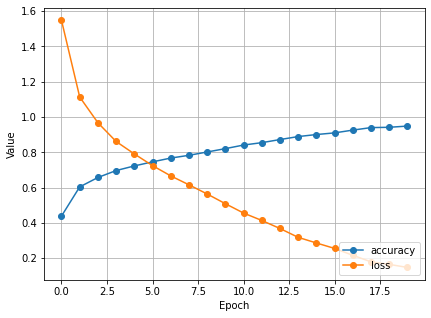

------------------------------------------------------------------------
> Fold 2 - Loss: 1.4426329135894775 - Accuracy: 66.6533350944519%


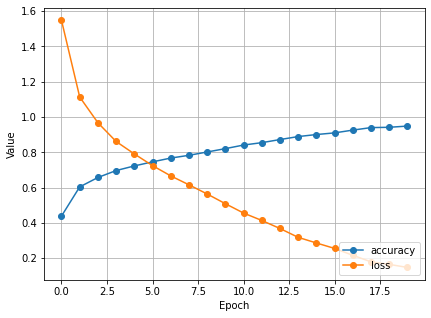

------------------------------------------------------------------------
> Fold 3 - Loss: 1.5379390716552734 - Accuracy: 67.29333400726318%


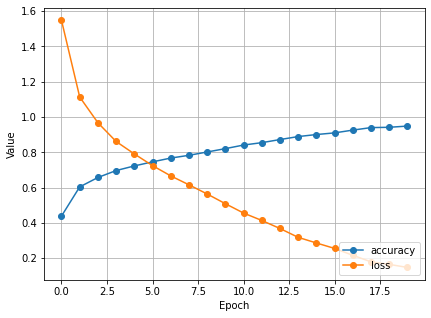

------------------------------------------------------------------------
> Fold 4 - Loss: 1.7184484004974365 - Accuracy: 67.77999997138977%


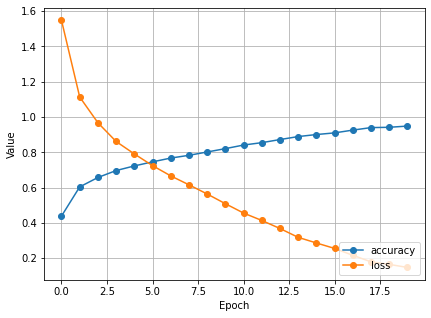

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 67.66833364963531 (+- 0.8392628537751048)
> Loss: 1.6563107669353485
------------------------------------------------------------------------


In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt


batch_size = 80
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 20
optimizer = Adam()
verbosity = 1
num_folds = 4


(input_train, target_train), (input_test, target_test) = cifar10.load_data()


input_shape = (img_width, img_height, img_num_channels)


input_train = input_train.astype('float32')
input_test = input_test.astype('float32')


input_train = input_train / 255
input_test = input_test / 255


acc_per_fold = []
loss_per_fold = []


inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)


kfold = KFold(n_splits=num_folds, shuffle=True)


fold_no = 1
for train, test in kfold.split(inputs, targets):

 
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))


  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])



  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')


  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)


  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])


  fold_no = fold_no + 1


print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
   
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], 'o-', label='accuracy')
    plt.plot(history.history['loss'], 'o-', label='loss')
    #plt.plot(fold_no['KFold'], 'o-', label = 'loss_per_fold')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')